In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/GRE_Maharashtra_Data.xlsx')
df.head()

,Year,Country/ State/ UT Name,All Categories - Male,All Categories - Female,All Categories - Total,SC - Male,SC - Female,SC - Total,ST - Male,ST - Female,ST - Total
0,2010-11,Maharashtra,30.7,24.2,27.6,32.7,24.9,28.9,16.2,8.7,12.3
1,2011-12,Maharashtra,28.1,24.3,26.3,25.7,22.0,23.9,14.2,8.6,11.4
2,2012-13,Maharashtra,25.0,20.6,22.9,20.6,16.9,18.9,11.3,6.5,8.9
3,2013-14,Maharashtra,28.3,23.9,26.3,24.4,19.6,22.1,13.7,7.7,10.7
4,2014-15,Maharashtra,30.0,25.6,27.9,27.6,23.4,25.6,15.7,9.5,12.6


In [8]:
df.head()

,Country/ State/ UT Name,All Categories - Male,All Categories - Female,All Categories - Total,SC - Male,SC - Female,SC - Total,ST - Male,ST - Female,ST - Total
Year,,,,,,,,,,
2010-11,Maharashtra,30.7,24.2,27.6,32.7,24.9,28.9,16.2,8.7,12.3
2011-12,Maharashtra,28.1,24.3,26.3,25.7,22.0,23.9,14.2,8.6,11.4
2012-13,Maharashtra,25.0,20.6,22.9,20.6,16.9,18.9,11.3,6.5,8.9
2013-14,Maharashtra,28.3,23.9,26.3,24.4,19.6,22.1,13.7,7.7,10.7
2014-15,Maharashtra,30.0,25.6,27.9,27.6,23.4,25.6,15.7,9.5,12.6


In [9]:
df.describe()

,All Categories - Male,All Categories - Female,All Categories - Total,SC - Male,SC - Female,SC - Total,ST - Male,ST - Female,ST - Total
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,29.000000,24.366667,26.816667,27.150000,22.300000,24.833333,14.866667,8.733333,11.766667
std,2.433105,2.298405,2.331023,4.607277,3.649658,4.083952,2.343217,1.659719,1.953117
min,25.000000,20.600000,22.900000,20.600000,16.900000,18.900000,11.300000,6.500000,8.900000
25%,28.150000,23.975000,26.300000,24.725000,20.200000,22.550000,13.825000,7.925000,10.875000
50%,29.150000,24.250000,26.950000,26.650000,22.700000,24.750000,14.950000,8.650000,11.850000
75%,30.525000,25.275000,27.825000,30.825000,24.525000,28.075000,16.075000,9.300000,12.525000
max,31.900000,27.600000,29.900000,32.700000,27.000000,29.600000,18.100000,11.400000,14.700000


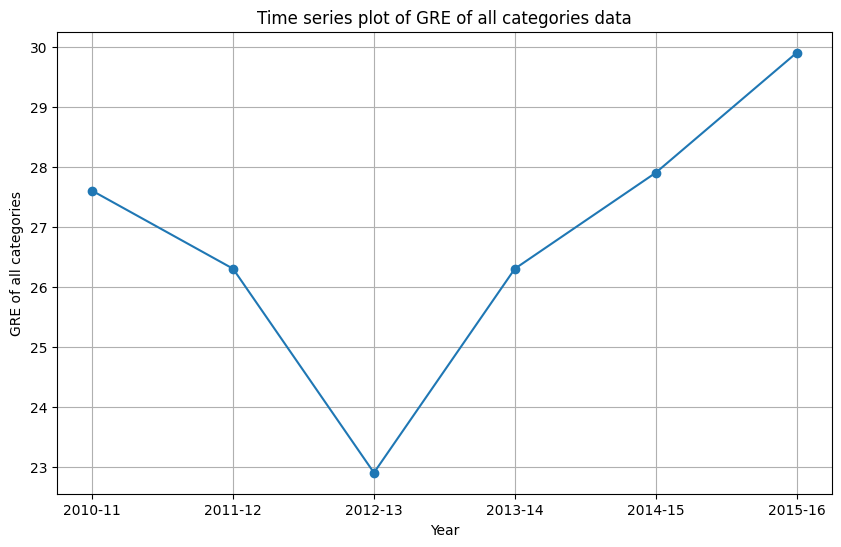

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(df.index, df['All Categories - Total'], marker='o',linestyle='-')
plt.title('Time series plot of GRE of all categories data')
plt.xlabel('Year')
plt.ylabel('GRE of all categories')
plt.grid(True)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(WPI):
  result = adfuller(WPI)
  lables = ['ADF Test stats', 'p-value', 'lags used', 'no of obs used']
  for value, label in zip(result, lables):
    print(label + ':' + str(value))
  if result[1] <= 0.05:
    print('Data is stationary')
  else:
    print('data is not stationary')

In [12]:
adfuller_test(df['All Categories - Total'])

ADF Test stats:-0.871058683438486
p-value:0.7973537668876174
lags used:0
no of obs used:5
data is not stationary


In [13]:
selected_col = df['All Categories - Total']
new_df = pd.DataFrame(selected_col)


In [14]:
new_df.head()

,All Categories - Total
Year,
2010-11,27.6
2011-12,26.3
2012-13,22.9
2013-14,26.3
2014-15,27.9


In [15]:
new_df['first_diff'] = new_df['All Categories - Total'] - new_df['All Categories - Total'].shift(1)

In [16]:
new_df.head()

,All Categories - Total,first_diff
Year,,
2010-11,27.6,NaN
2011-12,26.3,-1.3
2012-13,22.9,-3.4
2013-14,26.3,3.4
2014-15,27.9,1.6


In [17]:
adfuller_test(new_df['first_diff'].dropna())

ADF Test stats:-1.3750290735803998
p-value:0.5941872349440928
lags used:0
no of obs used:4
data is not stationary


In [18]:
new_df['sec_diff'] = new_df['first_diff'] - new_df['first_diff'].shift(1)

In [19]:
new_df.head()

,All Categories - Total,first_diff,sec_diff
Year,,,
2010-11,27.6,NaN,NaN
2011-12,26.3,-1.3,NaN
2012-13,22.9,-3.4,-2.1
2013-14,26.3,3.4,6.8
2014-15,27.9,1.6,-1.8


In [20]:
adfuller_test(new_df['sec_diff'].dropna())

ADF Test stats:-2.661034782451045
p-value:0.08102703697238367
lags used:0
no of obs used:3
data is not stationary


In [21]:
new_df['third_diff'] = new_df['sec_diff'] - new_df['sec_diff'].shift(1)

In [22]:
new_df.head()

,All Categories - Total,first_diff,sec_diff,third_diff
Year,,,,
2010-11,27.6,NaN,NaN,NaN
2011-12,26.3,-1.3,NaN,NaN
2012-13,22.9,-3.4,-2.1,NaN
2013-14,26.3,3.4,6.8,8.9
2014-15,27.9,1.6,-1.8,-8.6
